# Nonsingular Fields In General Relativity by Bonner
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 5th, 2022

There are several metrics here, we focus on 3.1 the Einstein Rosen metric and will return to the others later.

https://www.jstor.org/stable/24900449

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,theta,z,dt,dr,dtheta,dz = symbols('t r theta z dt dr dtheta dz')

In [4]:
rho = Function('rho')(r,t)
rho

In [5]:
Lambda = Function('lambda')(r,t)
Lambda

In [6]:
variables = Matrix( [t,r,theta,z] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix( [dt,dr,dtheta,dz] ) 
differentials

⎡  dt  ⎤
⎢      ⎥
⎢  dr  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣  dz  ⎦

In [9]:
lineElement =  expand( - exp(rho) * dz**2 - exp(Lambda) * dr**2 - r**2 * exp(-rho) *dtheta**2 + exp(Lambda) *dt**2 ) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ λ(r, t)                                     ⎤
⎢ℯ             0            0            0    ⎥
⎢                                             ⎥
⎢            λ(r, t)                          ⎥
⎢   0      -ℯ               0            0    ⎥
⎢                                             ⎥
⎢                       2  -ρ(r, t)           ⎥
⎢   0          0      -r ⋅ℯ              0    ⎥
⎢                                             ⎥
⎢                                      ρ(r, t)⎥
⎣   0          0            0        -ℯ       ⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡ λ(r, t)                                     ⎤
⎢ℯ             0            0            0    ⎥
⎢                                             ⎥
⎢            λ(r, t)                          ⎥
⎢   0      -ℯ               0            0    ⎥
⎢                                             ⎥
⎢                       2  -ρ(r, t)           ⎥
⎢   0          0      -r ⋅ℯ              0    ⎥
⎢                                             ⎥
⎢                                      ρ(r, t)⎥
⎣   0          0            0        -ℯ       ⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t r theta z")
t,r,theta,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂            ∂                                                                                 ⎤  ⎡∂            ∂                      
⎢⎢──(λ(r, t))  ──(λ(r, t))                                                                       ⎥  ⎢──(λ(r, t))  ──(λ(r, t))            
⎢⎢∂t           ∂r                                                                                ⎥  ⎢∂r           ∂t                     
⎢⎢───────────  ───────────                   0                                   0               ⎥  ⎢───────────  ───────────            
⎢⎢     2            2                                                                            ⎥  ⎢     2            2                 
⎢⎢                                                                                               ⎥  ⎢                                    
⎢⎢∂            ∂                                                                                 ⎥  ⎢∂            ∂                      
⎢⎢──(λ(r, t))  ──(λ(r, t))        

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡    2                2                           2                                                                                      
⎢   ∂                ∂               ⎛∂          ⎞    ∂                                                                                  
⎢r⋅───(λ(r, t)) - r⋅───(λ(r, t)) - r⋅⎜──(ρ(r, t))⎟  + ──(λ(r, t))                  ∂           ∂             ∂             ∂             
⎢    2                2              ⎝∂t         ⎠    ∂r                       - r⋅──(ρ(r, t))⋅──(ρ(r, t)) + ──(λ(r, t)) + ──(ρ(r, t))   
⎢  ∂r               ∂t                                                             ∂r          ∂t            ∂t            ∂t            
⎢────────────────────────────────────────────────────────────────              ───────────────────────────────────────────────────────   
⎢                              2⋅r                                                                       2⋅r                             
⎢                                 

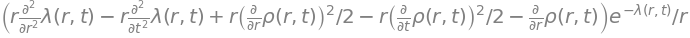

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                     2                      2                                                                                           
⎢        ⎛∂          ⎞          ⎛∂          ⎞    ∂             ∂                            ∂           ∂             ∂             ∂    
⎢- 0.5⋅r⋅⎜──(ρ(r, t))⎟  - 0.5⋅r⋅⎜──(ρ(r, t))⎟  + ──(λ(r, t)) + ──(ρ(r, t))              - r⋅──(ρ(r, t))⋅──(ρ(r, t)) + ──(λ(r, t)) + ──(ρ(
⎢        ⎝∂r         ⎠          ⎝∂t         ⎠    ∂r            ∂r                           ∂r          ∂t            ∂t            ∂t   
⎢─────────────────────────────────────────────────────────────────────────              ─────────────────────────────────────────────────
⎢                                   2⋅r                                                                           2⋅r                    
⎢                                                                                                                                        
⎢             ∂           ∂       

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

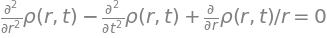

In [48]:
equation3pt2 = Eq( expand( (1/r)*Ric.tensor()[2,2].args[2] ), 0 ) 
equation3pt2

In [47]:
equation3pt3 = Eq(diff(Lambda,r),solve( simplify(einst.tensor())[0,0].args[2], diff(Lambda,r) )[0] ) 
equation3pt3

In [37]:
equation3pt4 = expand( Eq( diff(Lambda,t),solve( simplify(einst.tensor())[0,1].args[2], diff(Lambda,t) )[0] ) ) 
equation3pt4

In [50]:
vacuumFieldEquations = Matrix([equation3pt2,equation3pt3,equation3pt4])
vacuumFieldEquations

⎡                                           ∂                           ⎤
⎢               2              2            ──(ρ(r, t))                 ⎥
⎢              ∂              ∂             ∂r                          ⎥
⎢             ───(ρ(r, t)) - ───(ρ(r, t)) + ─────────── = 0             ⎥
⎢               2              2                 r                      ⎥
⎢             ∂r             ∂t                                         ⎥
⎢                                                                       ⎥
⎢                                 2                      2              ⎥
⎢∂                   ⎛∂          ⎞          ⎛∂          ⎞    ∂          ⎥
⎢──(λ(r, t)) = 0.5⋅r⋅⎜──(ρ(r, t))⎟  + 0.5⋅r⋅⎜──(ρ(r, t))⎟  - ──(ρ(r, t))⎥
⎢∂r                  ⎝∂r         ⎠          ⎝∂t         ⎠    ∂r         ⎥
⎢                                                                       ⎥
⎢         ∂               ∂           ∂             ∂                   ⎥
⎢         ──(λ(r, t)) = r⋅──(ρ(r, t))⋅

In [51]:
X, Y = map(Function, 'XY')

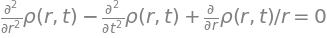

In [52]:
eq = vacuumFieldEquations[0]
eq

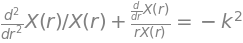

In [54]:
xODE = Eq(pde_separate( eq, rho, [X(r),Y(t)])[0] , -k**2 ) 
xODE

In [55]:
xSolution = dsolve( xODE , X(r))
xSolution 

In [56]:
#  Here we arbitrarily set one of the Bessel functions equal to zero... fix this later
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],1).subs(xSolution.args[1].args[1].args[0],0)
xSolutionParticular

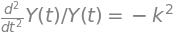

In [57]:
yODE = Eq( pde_separate( eq, rho, [X(r),Y(t)])[1] ,  -k**2 ) 
yODE

In [58]:
ySolution = dsolve( yODE , Y(t))
ySolution 

In [59]:
#  Here we arbitrarily set cos equal to zero... fix this later
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],0).subs(ySolution.args[1].args[1].args[0],1)
ySolutionParticular

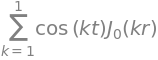

In [60]:
#  It looks like they only keep the k is one term.... 
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,1) )

In [63]:
#  Just keepign the k = 1 term 
rhoSolution = Eq(rho, Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,1) ).doit() ) 
rhoSolution

In [66]:
dlambdadr = equation3pt3.subs(rhoSolution.args[0],rhoSolution.args[1])
dlambdadr

In [67]:
dlambdadr.doit()

In [69]:
integrateLambdaWRTr = pdsolve( dlambdadr.doit() )
integrateLambdaWRTr

In [73]:
integrateLambdaWRTr.args[1].args[0]

In [75]:
lambdaSolutionR = integrateLambdaWRTr.subs(integrateLambdaWRTr.args[1].args[0],0)
lambdaSolutionR

In [78]:
dlambdadt = equation3pt4.subs(rhoSolution.args[0],rhoSolution.args[1])
dlambdadt

In [79]:
dlambdadt.doit()

In [88]:
integrateSolutionT = pdsolve( dlambdadt.doit() )
integrateSolutionT

In [90]:
lambdaSolutionT = integrateSolutionT.subs(integrateSolutionT.args[1].args[2],0)
lambdaSolutionT